# Melbourne Housing Market

# Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

# Target Analyst
Using this data create a model (Linear Regression) to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer

# Collect Data

In [51]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
import scipy.stats as stats
from scipy.stats import f_oneway
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn .linear_model import Ridge
import sklearn
from sklearn import linear_model
import warnings


In [52]:
#Collect data
pd.set_option('display.max_columns', None)
df_main = pd.read_csv("D:\DS8\melbou\Melbourne_housing_FULL.csv")

In [53]:
#Description example data
df_main.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [54]:
df_main.shape

(34857, 21)

In [55]:
# Check type of data
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

# EDA

In [56]:
# Check NaN data
df_main.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [57]:
# Check percent data is null
(df_main.isna().sum()/len(df_main)).sort_values(ascending=False)*100

BuildingArea     60.576068
YearBuilt        55.386293
Landsize         33.881286
Car              25.039447
Bathroom         23.599277
Bedroom2         23.573457
Longtitude       22.882061
Lattitude        22.882061
Price            21.832057
Regionname        0.008607
Propertycount     0.008607
CouncilArea       0.008607
Postcode          0.002869
Distance          0.002869
Date              0.000000
SellerG           0.000000
Method            0.000000
Type              0.000000
Rooms             0.000000
Address           0.000000
Suburb            0.000000
dtype: float64

In [58]:
#Visualize data missing
nullData = pd.DataFrame(df_main.isna().sum(), columns = ["Null"])
nullData["percentNull"] = (df_main.isna().sum()/len(df_main)).sort_values(ascending=False)*100
bar = go.Bar(
            x = nullData.index,
            y = nullData.Null,
            name = 'Feature')

scatter = go.Scatter(
            x = nullData.index,
            y = nullData.percentNull,
            name = 'Percent Null',
            yaxis = 'y2'
)
layout = dict(title = 'Missing value',
              xaxis = dict(),
              yaxis = dict(title = 'the number of missing value'),
              yaxis2 = dict(range = [0,100],
                           overlaying = 'y',
                           anchor = 'x',
                           side = 'right',
                           zeroline = False,
                           showgrid = False,
                           title = '%')
)

fig = go.Figure(data = [bar, scatter], layout = layout)
fig.show()


In [59]:
#Dropna value
df_new = df_main.dropna(subset=['Price','BuildingArea','YearBuilt','Landsize'])

In [60]:
#try check missing value:
(df_new.isna().sum()/len(df_new)).sort_values(ascending=False)*100

Car              1.473195
Longtitude       0.088613
Lattitude        0.088613
Propertycount    0.000000
Distance         0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Date             0.000000
Bedroom2         0.000000
Postcode         0.000000
Regionname       0.000000
Bathroom         0.000000
Landsize         0.000000
BuildingArea     0.000000
YearBuilt        0.000000
CouncilArea      0.000000
Suburb           0.000000
dtype: float64

In [61]:
# replace missing value with median:
listReplace = ['Car', 'Longtitude', 'Lattitude']
for i in listReplace:
    median = df_new[i].median()
    df_new = df_new.fillna(value = median)

In [62]:
#try check missing value:
(df_new.isna().sum()/len(df_new)).sort_values(ascending=False)*100

Propertycount    0.0
Postcode         0.0
Address          0.0
Rooms            0.0
Type             0.0
Price            0.0
Method           0.0
SellerG          0.0
Date             0.0
Distance         0.0
Bedroom2         0.0
Regionname       0.0
Bathroom         0.0
Car              0.0
Landsize         0.0
BuildingArea     0.0
YearBuilt        0.0
CouncilArea      0.0
Lattitude        0.0
Longtitude       0.0
Suburb           0.0
dtype: float64

In [63]:
# check unique class
for i in df_new.columns:
    print("column:",i,":", len(df_new[i].unique()), "classes")
    print("================================")

column: Suburb : 316 classes
column: Address : 8903 classes
column: Rooms : 10 classes
column: Type : 3 classes
column: Price : 1857 classes
column: Method : 5 classes
column: SellerG : 251 classes
column: Date : 77 classes
column: Distance : 201 classes
column: Postcode : 194 classes
column: Bedroom2 : 12 classes
column: Bathroom : 9 classes
column: Car : 11 classes
column: Landsize : 1241 classes
column: BuildingArea : 593 classes
column: YearBuilt : 143 classes
column: CouncilArea : 33 classes
column: Lattitude : 5756 classes
column: Longtitude : 6177 classes
column: Regionname : 8 classes
column: Propertycount : 313 classes


In [64]:
# Change value to year
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new['Date'] = df_new['Date'].dt.year

In [66]:
#Remove columns have over 200 class
for i in df_new.columns:
    if i != 'Price':
        if len(df_new[i].unique()) > 200:
            df_new.drop(i, axis=1, inplace=True)

In [67]:
# check unique class
for i in df_new.columns:
    print("column:",i,":", len(df_new[i].unique()), "classes")
    print("================================")

column: Rooms : 10 classes
column: Type : 3 classes
column: Price : 1857 classes
column: Method : 5 classes
column: Date : 3 classes
column: Postcode : 194 classes
column: Bedroom2 : 12 classes
column: Bathroom : 9 classes
column: Car : 11 classes
column: YearBuilt : 143 classes
column: CouncilArea : 33 classes
column: Regionname : 8 classes


In [68]:
#Descriptive statictics
df_new.describe(percentiles = [.1, .25, .5, .75, .9, .95, .99])

,Rooms,Price,Date,Postcode,Bedroom2,Bathroom,Car,YearBuilt
count,9028.000000,9.028000e+03,9028.000000,9028.000000,9028.000000,9028.000000,9028.000000,9028.000000
mean,3.094816,1.094959e+06,2016.734825,3111.656513,3.074435,1.642446,1.697164,1965.072663
std,0.961704,6.767294e+05,0.660588,112.579350,0.964070,0.719709,0.968888,37.457705
min,1.000000,1.310000e+05,2016.000000,3000.000000,0.000000,1.000000,0.000000,1196.000000
10%,2.000000,4.900000e+05,2016.000000,3020.000000,2.000000,1.000000,1.000000,1910.000000
25%,2.000000,6.450000e+05,2016.000000,3044.000000,2.000000,1.000000,1.000000,1940.000000
50%,3.000000,9.000000e+05,2017.000000,3083.000000,3.000000,2.000000,2.000000,1970.000000
75%,4.000000,1.350000e+06,2017.000000,3150.000000,4.000000,2.000000,2.000000,2000.000000
90%,4.000000,1.900000e+06,2018.000000,3190.000000,4.000000,2.000000,3.000000,2010.000000
95%,5.000000,2.360650e+06,2018.000000,3205.000000,5.000000,3.000000,4.000000,2013.000000


In [69]:
df_check = df_new[df_new['Price'] == 9.000000e+06 ]
df_check

,Rooms,Type,Price,Method,Date,Postcode,Bedroom2,Bathroom,Car,YearBuilt,CouncilArea,Regionname
19583,3,h,9000000.0,PI,2017,3170.0,3.0,1.0,1.0,1960.0,Monash City Council,South-Eastern Metropolitan


# Check numberical data and catacorical

In [70]:
num_feature = list()
for column in df_new.columns:
    if df_new[column].dtype != object:
        num_feature.append(column)
print("Numerical feature is:",len(num_feature))
print(num_feature)

Numerical feature is: 8
['Rooms', 'Price', 'Date', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt']


In [71]:
cat_feature = list()
for column in df_new.columns:
    if df_new[column].dtype == object:
        cat_feature.append(column)
print("Categorical feature is:",len(cat_feature))
print(cat_feature)

Categorical feature is: 4
['Type', 'Method', 'CouncilArea', 'Regionname']


In [72]:
for i in num_feature:
    fig = go.Figure()
    fig.add_trace(go.Box(
        y = df_new[i],
        name = i,
        boxpoints = 'suspectedoutliers',
    ))
    fig.show()

In [73]:
#Remove outliner
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rooms             2.0
Price        705000.0
Date              1.0
Postcode        106.0
Bedroom2          2.0
Bathroom          1.0
Car               1.0
YearBuilt        60.0
dtype: float64


In [74]:
new_data_outlier = df_new[~((df_new < (Q1 - 1.5 * IQR)) | (df_new > (Q3 + 1.5 * IQR))).any(axis=1)]

In [75]:
#Check data after remove outliner
for i in num_feature:
    fig = go.Figure()
    fig.add_trace(go.Box(
        y = new_data_outlier[i],
        name = i,
        boxpoints = 'suspectedoutliers',
    ))
    fig.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251B4175448>,
      dtype=object)

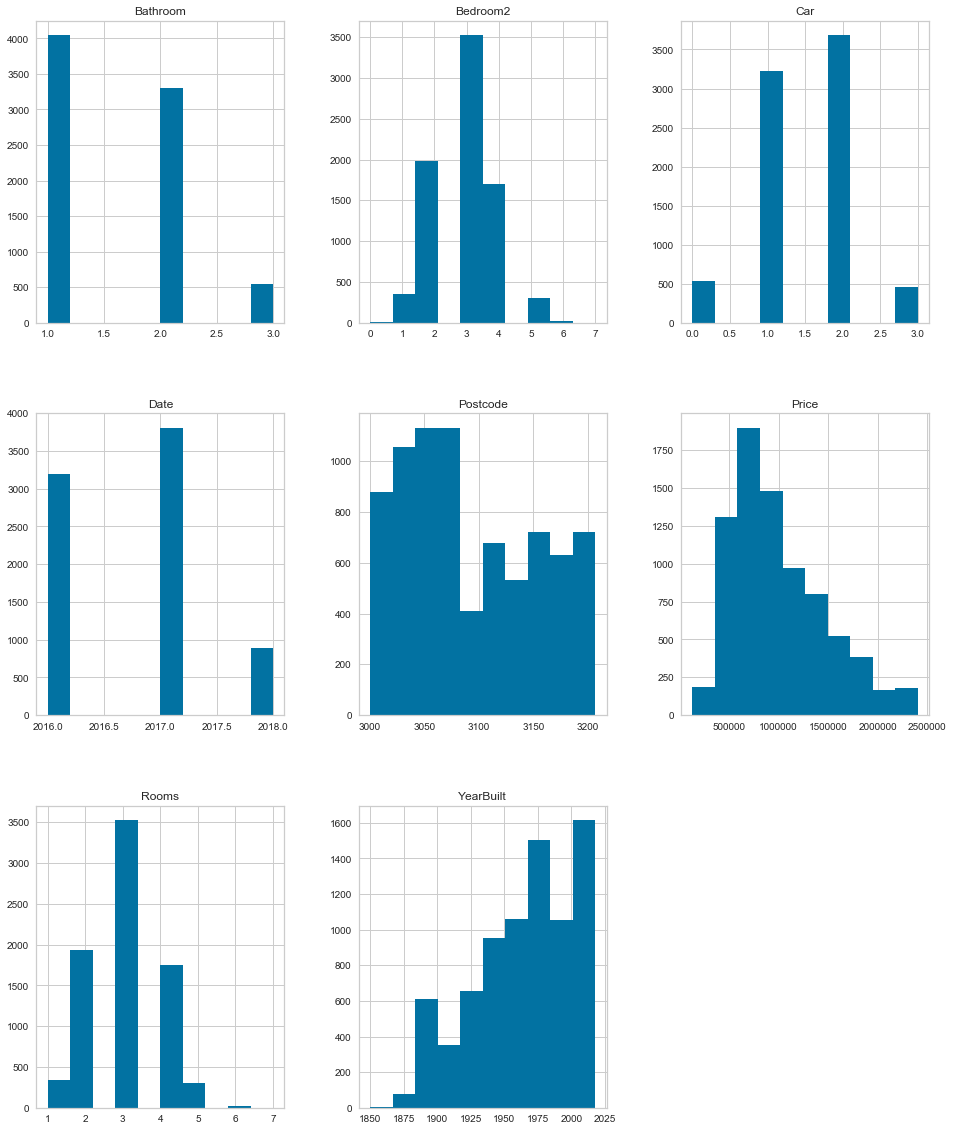

In [76]:
#visualize histogram data
new_data_outlier[num_feature].hist(figsize=(16,20))

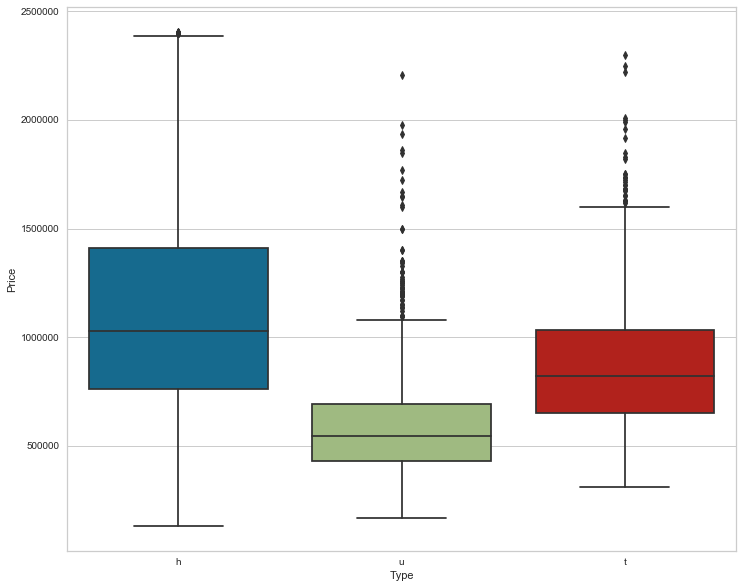

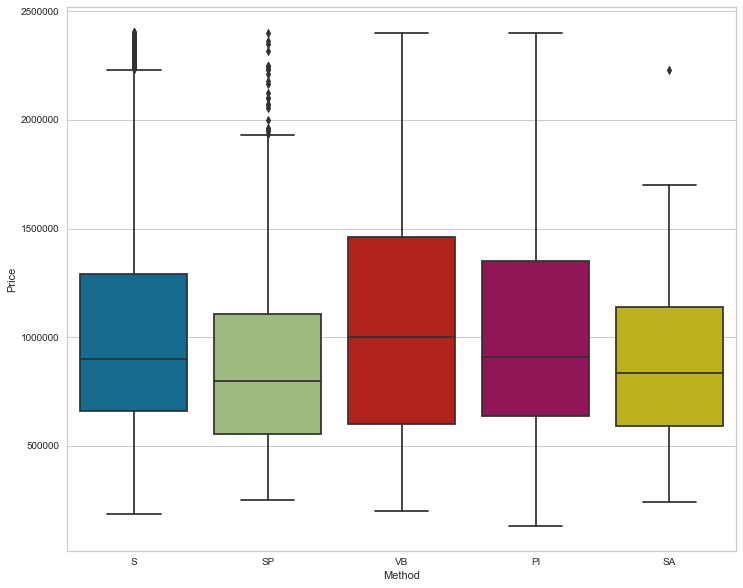

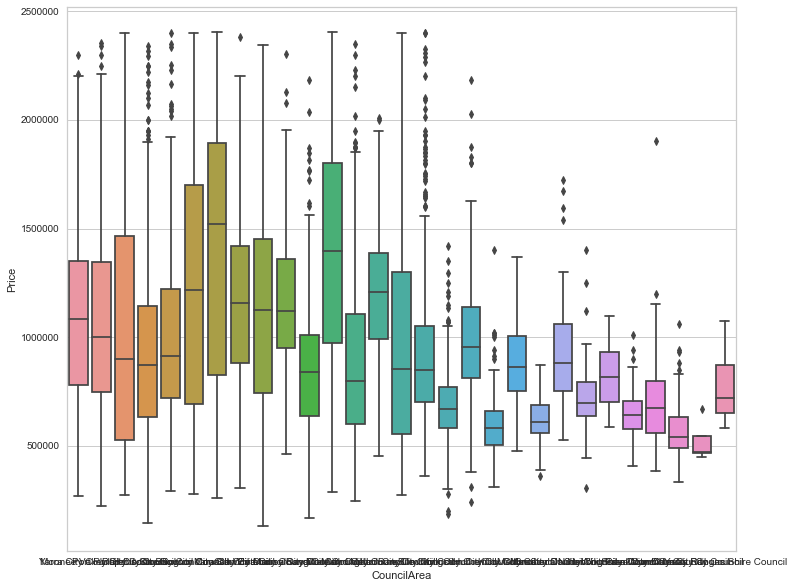

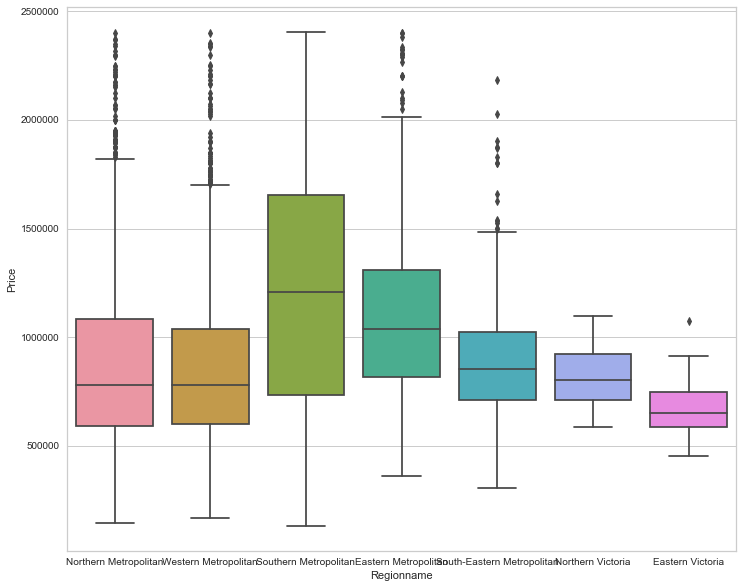

In [77]:
#visualize categorical data
for i in cat_feature:
    plt.figure(figsize=(12,10))
    sns.boxplot(x=i, y = 'Price', data = new_data_outlier)

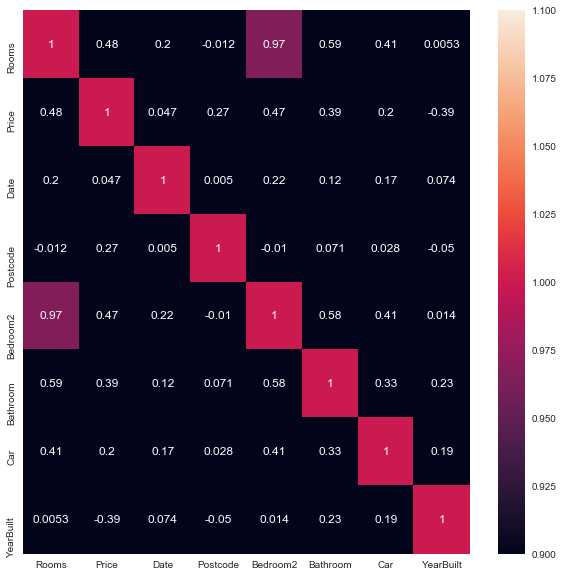

In [78]:

#correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(new_data_outlier.corr(), vmax = 1.0, vmin = 1.0, annot = True)

In [80]:
#remove not relate feature
new_data_outlier = new_data_outlier.drop(columns = ['Date','Bedroom2'])

In [192]:
new_data_outlier.head()

,Rooms,Type,Price,Method,Postcode,Bathroom,Car,YearBuilt,CouncilArea,Regionname
2,2,h,1035000.0,S,3067.0,1.0,0.0,1900.0,Yarra City Council,Northern Metropolitan
4,3,h,1465000.0,SP,3067.0,2.0,0.0,1900.0,Yarra City Council,Northern Metropolitan
6,4,h,1600000.0,VB,3067.0,1.0,2.0,2014.0,Yarra City Council,Northern Metropolitan
11,3,h,1876000.0,S,3067.0,2.0,0.0,1910.0,Yarra City Council,Northern Metropolitan
14,2,h,1636000.0,S,3067.0,1.0,2.0,1890.0,Yarra City Council,Northern Metropolitan


# Hypothesis testing

In [191]:
f, p = stats.f_oneway(new_data_outlier['Price'][new_data_outlier['Type'] == 'h'],
               new_data_outlier['Price'][new_data_outlier['Type'] == 'u'],
               new_data_outlier['Price'][new_data_outlier['Type'] == 't'])
if p < 0.05:
    print("Reject H0 : Value is not same with other Type")
else:
    print("Accept H0 : Value is same")

Reject H0 : Value is not same with other Type


In [190]:
f, p = stats.f_oneway(new_data_outlier['Price'][new_data_outlier['Method'] == 'S'],
               new_data_outlier['Price'][new_data_outlier['Method'] == 'PI'],
               new_data_outlier['Price'][new_data_outlier['Method'] == 'SP'],
               new_data_outlier['Price'][new_data_outlier['Method'] == 'VB'],
               new_data_outlier['Price'][new_data_outlier['Method'] == 'SA'])
if p < 0.05:
    print("Reject H0 : Value is not same with other Method")
else:
    print("Accept H0 : Value is same")

Reject H0 : Value is not same with other Method


In [189]:
f, p = stats.f_oneway(new_data_outlier['Price'][new_data_outlier['Regionname'] == 'Northern Metropolitan'],
               new_data_outlier['Price'][new_data_outlier['Regionname'] == 'Western Metropolitan'],
               new_data_outlier['Price'][new_data_outlier['Regionname'] == 'Southern Metropolitan'],
               new_data_outlier['Price'][new_data_outlier['Regionname'] == 'Eastern Metropolitan'],
               new_data_outlier['Price'][new_data_outlier['Regionname'] == 'South-Eastern Metropolitan'],
               new_data_outlier['Price'][new_data_outlier['Regionname'] == 'Northern Victoria'],
               new_data_outlier['Price'][new_data_outlier['Regionname'] == 'Eastern Victoria'])
if p < 0.05:
    print("Reject H0 : Value is not same with other Regionname")
else:
    print("Accept H0 : Value is same")

Reject H0 : Value is not same with other Regionname


In [187]:
f, p = stats.f_oneway(new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Yarra City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Moonee Valley City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Port Phillip City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Darebin City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Hobsons Bay City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Stonnington City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Boroondara City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Monash City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Glen Eira City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Whitehorse City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Maribyrnong City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Bayside City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Moreland City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Manningham City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Melbourne City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Banyule City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Brimbank City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Kingston City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Hume City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Knox City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Melton City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Maroondah City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Greater Dandenong City Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Nillumbik Shire Council'],
               new_data_outlier['Price'][new_data_outlier['CouncilArea'] == 'Whittlesea City Council'],)
if p < 0.05:
    print("Reject H0 : Value is not same with other CouncilArea")
else:
    print("Accept H0 : Value is same")

Reject H0 : Value is not same with other CouncilArea


# Apply model to prediction

# Holdout

In [31]:
new_data_outlier.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Postcode',
       'Bathroom', 'YearBuilt', 'CouncilArea', 'Regionname'],
      dtype='object')

In [82]:
data_pre = pd.get_dummies(new_data_outlier, columns = ['Type', 'Method','CouncilArea', 'Regionname'])
data_pre.shape

(7889, 50)

In [83]:
X = data_pre.drop('Price', axis = 1)
y = data_pre['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .20, random_state=0)

In [84]:
data_pre.head()


,Rooms,Price,Postcode,Bathroom,Car,YearBuilt,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,CouncilArea_Banyule City Council,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan
2,2,1035000.0,3067.0,1.0,0.0,1900.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,3,1465000.0,3067.0,2.0,0.0,1900.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
6,4,1600000.0,3067.0,1.0,2.0,2014.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
11,3,1876000.0,3067.0,2.0,0.0,1910.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
14,2,1636000.0,3067.0,1.0,2.0,1890.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [121]:
data_pre.shape

(7889, 50)

In [85]:
regressionmodel = LinearRegression()
regressionmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
y_pred = regressionmodel.predict(X_test)

In [87]:
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R^2', metrics.explained_variance_score(y_test,y_pred))

RMSE 258501.2622634146
R^2 0.7016847515119258


# Cross validation

In [119]:
cv_results = cross_validate(regressionmodel, X, y, cv=5)
cv_results['test_score']

array([0.68841889, 0.68168495, 0.66595261, 0.67418785, 0.65615622])

# residue visualize

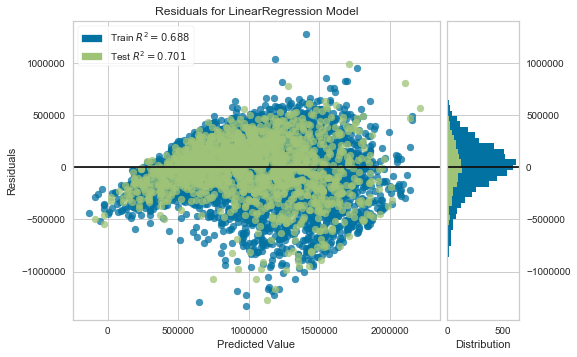

In [89]:
model = LinearRegression()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# Apply PCA

In [125]:
def catch_score(component):
    pca = PCA(n_components = component)
    pca_data =new_data_outlier.copy()
    pca_data = pd.get_dummies(pca_data, columns = ['Type', 'Method','CouncilArea', 'Regionname'])
    X = pca_data.drop('Price', axis = 1)
    y_pca = pca_data['Price']
    X_pca = pd.DataFrame(pca.fit_transform(X))
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca , test_size= .20, random_state=0)
    regressionmodel = LinearRegression()
    regressionmodel.fit(X_train_pca, y_train_pca)
    y_pred_pca = regressionmodel.predict(X_test_pca)
    return metrics.explained_variance_score(y_test_pca,y_pred_pca)

score = [catch_score(component) for component in range(1,50)]
print(score)

[0.07934553564844582, 0.20608587933046896, 0.5093990351640787, 0.5112126567007333, 0.5142996747337559, 0.5147071865770172, 0.5458587543898137, 0.5462635681067469, 0.5577592223935258, 0.5649842991092027, 0.5760301357758009, 0.5856586385876359, 0.5913206002468083, 0.5924340467048361, 0.5925770916291384, 0.5980068623043343, 0.5997145209961223, 0.5995975851485583, 0.6007959523978824, 0.605688933593429, 0.6100687025706413, 0.629755599267662, 0.6338451306078691, 0.6412058325061447, 0.6442698010777896, 0.6468336609774672, 0.6459652603703339, 0.6491325288684638, 0.6721229530263564, 0.6758182551388122, 0.6797653920461542, 0.6801802820903812, 0.6805799123259222, 0.6806718454267606, 0.6814823982688464, 0.6870656157581303, 0.6871207740377065, 0.687088755585191, 0.7003322553415129, 0.7006966368781649, 0.7009699962204583, 0.7008954380234, 0.7009353401721182, 0.701026637007722, 0.7016847515119302, 0.701301792375048, 0.7013034520841246, 0.701262685145082, 0.7013072347386777]


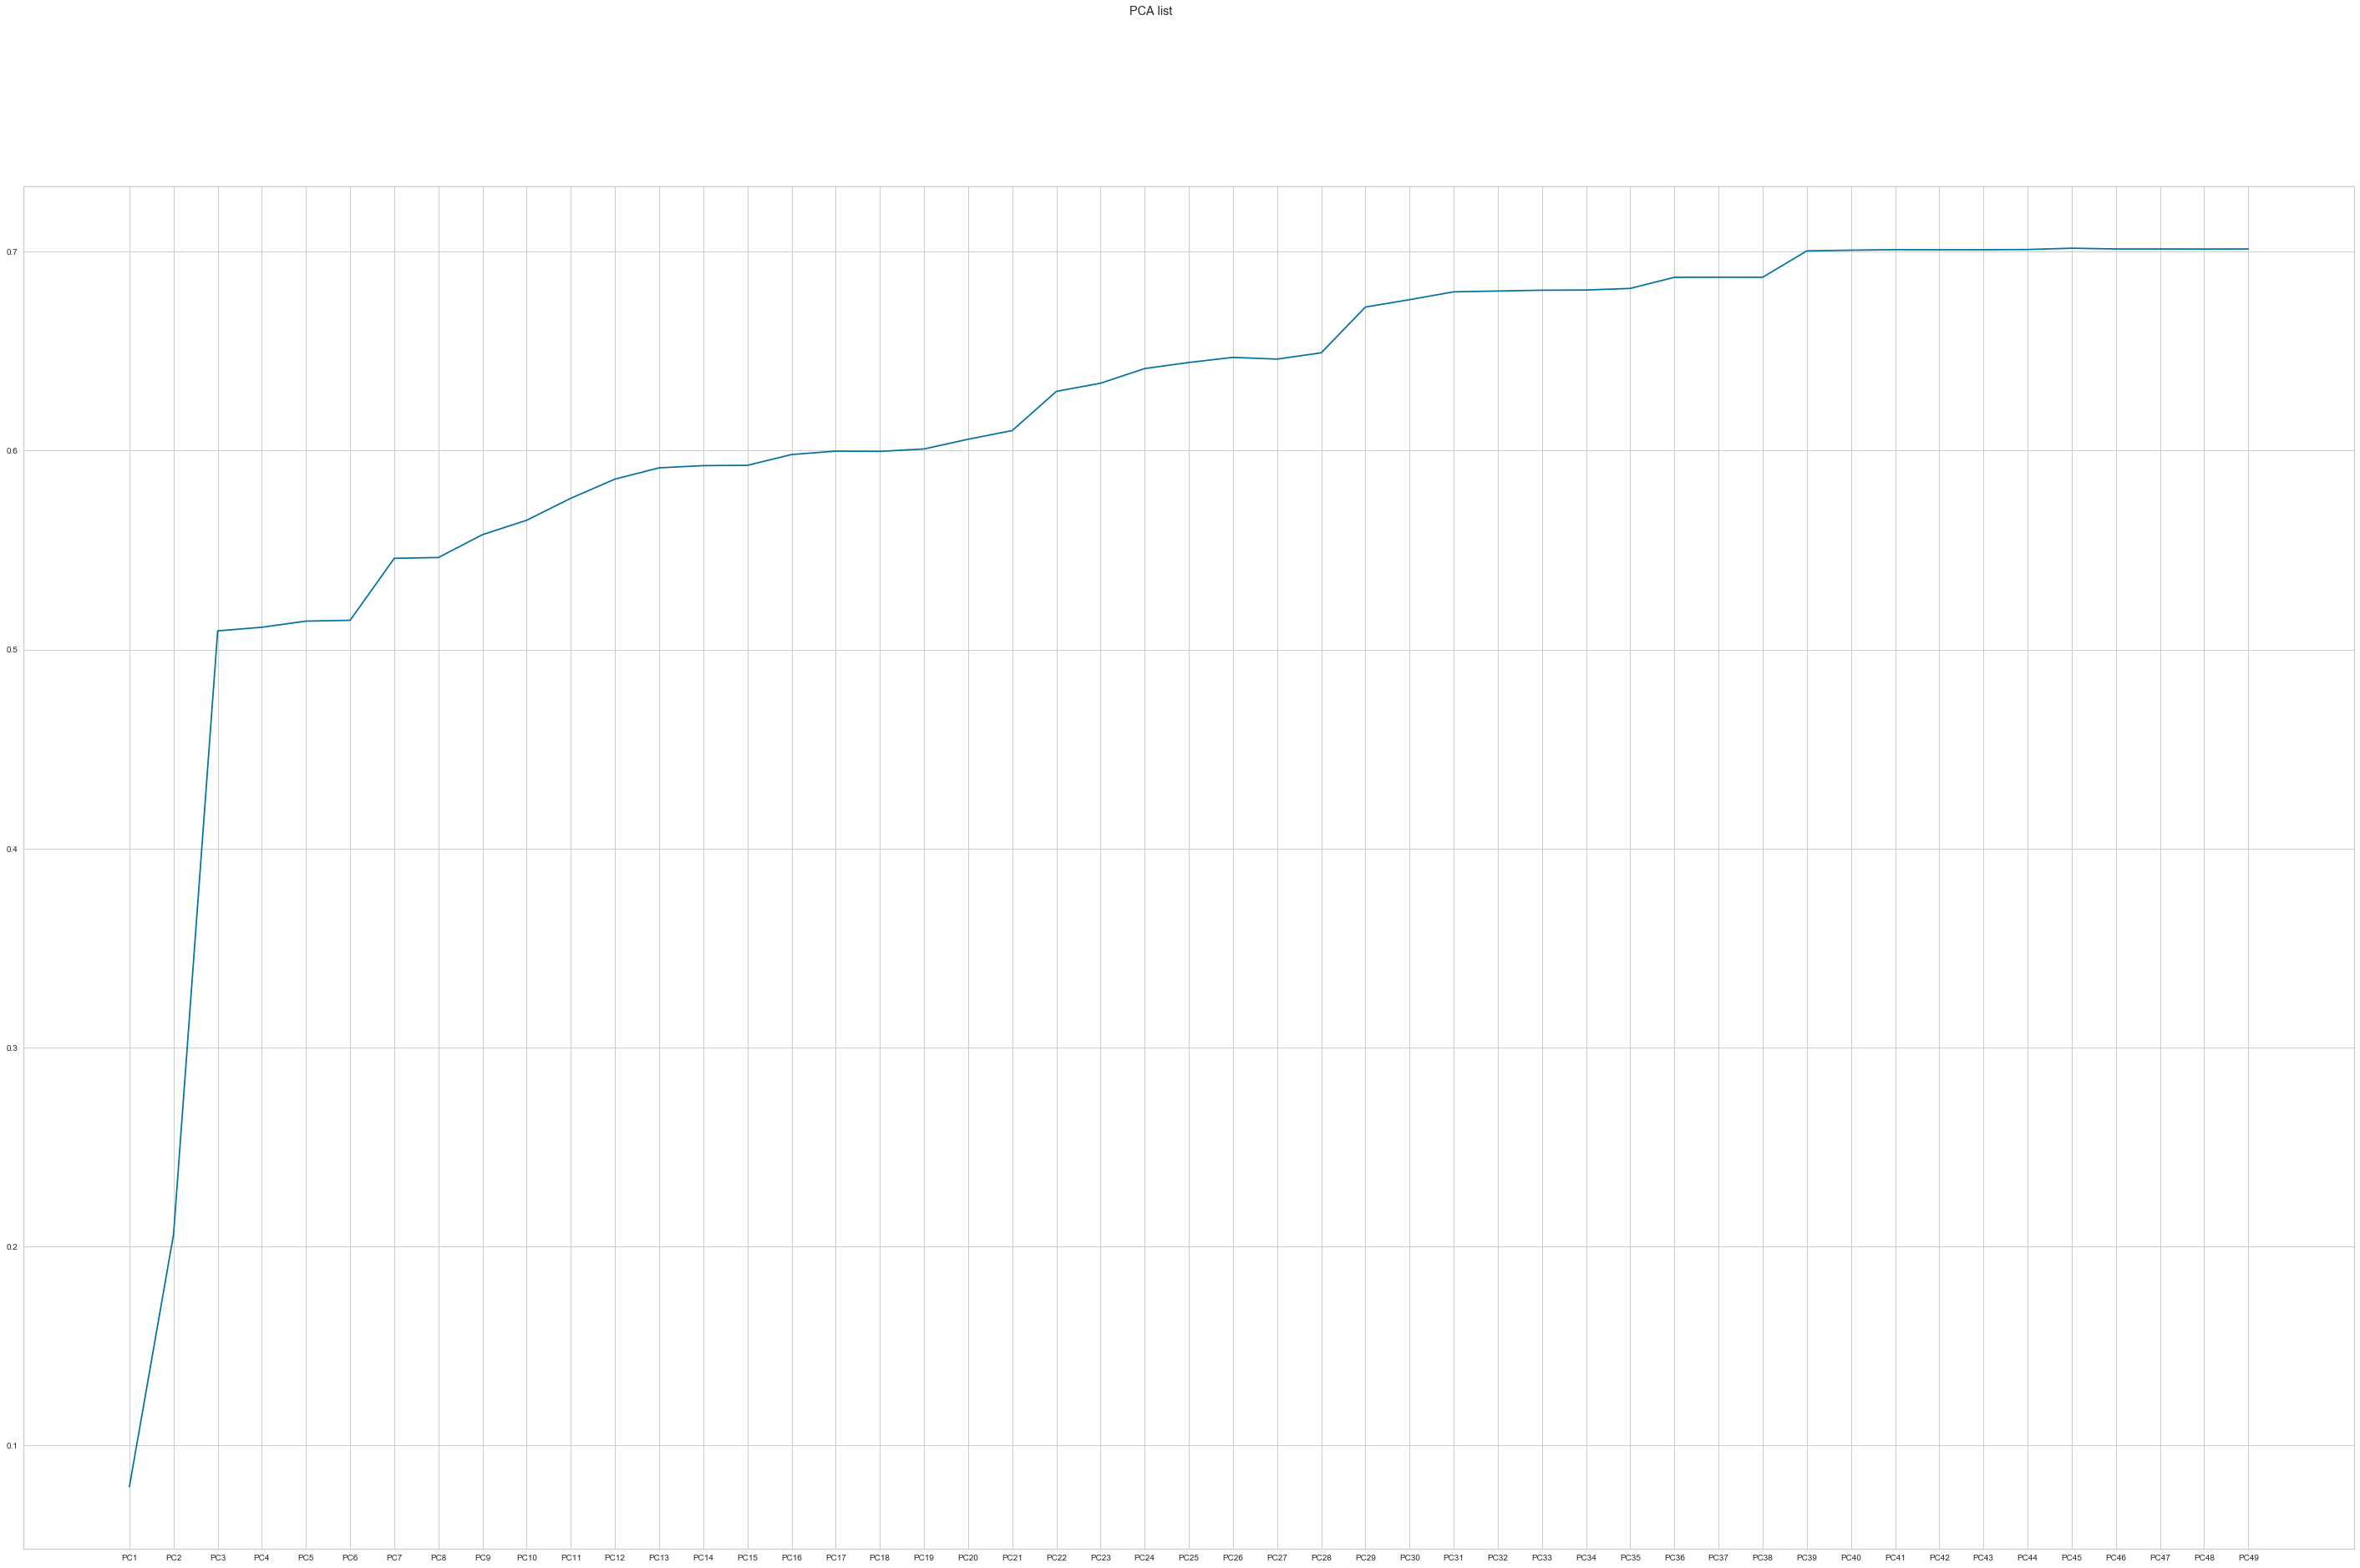

In [137]:
list_name = [('PC' + str(PC)) for PC in range(1,50)]
plt.figure(figsize=(50, 30))    
plt.plot(list_name, score)
plt.suptitle('PCA list')
plt.show()

In [160]:
pca = PCA(n_components = 39)
pca_data = new_data_outlier.copy()
pca_data = pd.get_dummies(pca_data, columns = ['Type', 'Method','CouncilArea', 'Regionname'])
pca_data.head()

,Rooms,Price,Postcode,Bathroom,Car,YearBuilt,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,CouncilArea_Banyule City Council,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan
2,2,1035000.0,3067.0,1.0,0.0,1900.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,3,1465000.0,3067.0,2.0,0.0,1900.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
6,4,1600000.0,3067.0,1.0,2.0,2014.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
11,3,1876000.0,3067.0,2.0,0.0,1910.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
14,2,1636000.0,3067.0,1.0,2.0,1890.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [161]:
X = pca_data.drop('Price', axis = 1)
y_pca = pca_data['Price']

X_pca = pd.DataFrame(pca.fit_transform(X))

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca , test_size= .20, random_state=0)
regressionmodel = LinearRegression()
regressionmodel.fit(X_train_pca, y_train_pca)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
y_pred_pca = regressionmodel.predict(X_test_pca)
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test_pca,y_pred_pca)))
print('R^2', metrics.explained_variance_score(y_test_pca,y_pred_pca))

RMSE 259081.40798511292
R^2 0.7003322553415129


# Cross Validation

In [163]:
cv_results = cross_validate(regressionmodel, X_pca, y_pca, cv=5)
cv_results['test_score']

array([0.68861389, 0.68435395, 0.66482981, 0.6726157 , 0.65470868])

# residue visualize after PCA

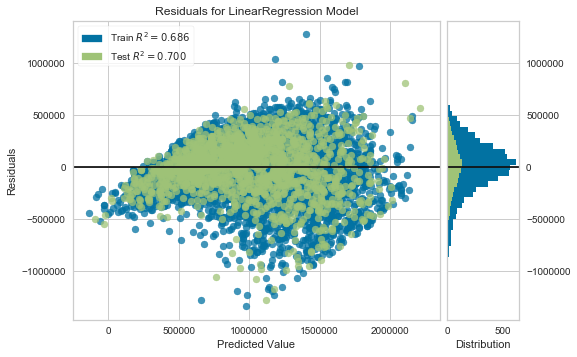

In [164]:
model = LinearRegression()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train_pca, y_train_pca)
visualizer.score(X_test_pca, y_test_pca)
visualizer.show()

# Tune model

In [ ]:
GridSearchCV
RandomSearchCV 